# K-Nearest Neighbors Algorithm

The KNN algorithm operates by calculating the distances between a new data point and its neighboring points in the training dataset. The "k" in KNN refers to the number of nearest neighbors considered for classification. The algorithm assigns the majority class label among the k nearest neighbors to the new data point.
KNN is a simple yet powerful algorithm, often used for its simplicity and ability to handle complex decision boundaries.

In [211]:
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [212]:
data = pd.read_csv("Iris.csv")
data.groupby('Species').size()
s = {'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica': 2}
data.Species = [s[item] for item in data.Species]
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


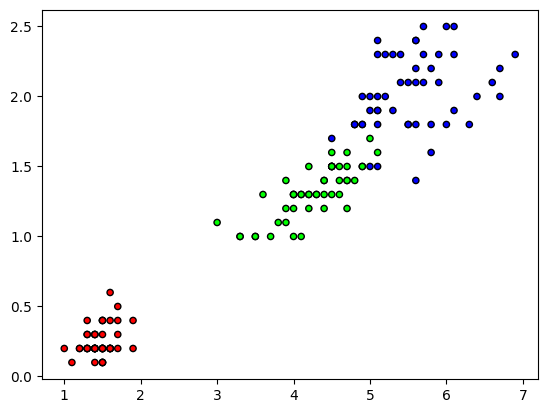

In [213]:
X = data.iloc[:,3:5].values # Features
y = data.iloc[:, 5].values  #Target
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap,edgecolor='k',s=20)
plt.show()

In [214]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state = 42)

In [215]:
def euclidian_distance(x1,x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [216]:
class KNN:
    def __init__(self,k=3):
        self.k = k    
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
    def predict(self,X):
        predictions = [self._predict(x) for x in X]
        return predictions
    def _predict(self,x):
        distances = [euclidian_distance(x,x_train) for x_train in self.X_train]

        #Get the closest k
        k_indices =    np.argsort(distances)[:self.k] #Indices for the closest k neighbours
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [217]:
clf = KNN(k=5)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

In [218]:
accuracy = np.sum(predictions == y_test)/len(y_test)
accuracy

0.9866666666666667